In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# 6.4.2 Gaussian processes for regression

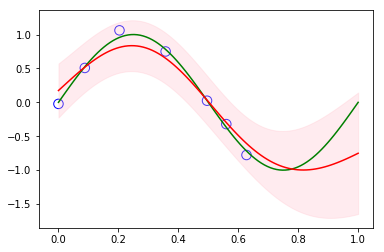

In [9]:
Nt = 100
t = np.linspace(0, 1, Nt).reshape(-1,1)
yt = np.sin(2*np.pi*t)
plt.figure()
plt.plot(t, yt, color='green')
np.random.seed(3)
x = np.random.uniform(0, .7, 7).reshape(-1,1)
x[0] = 0
x[4] = .56
y = np.sin(2*np.pi*x) + np.random.normal(0, .05, 7).reshape(-1,1)
plt.scatter(x, y, marker='o', color='', edgecolors='blue', s=90)

def gaussian_kernel(X, Y, sigma):
    K = np.exp(-cdist(X, Y)**2/(2*sigma))
    return K

inv_beta = .1
train_X = x
sigma = .1
CN = gaussian_kernel(train_X, train_X, sigma) + inv_beta * np.eye(train_X.shape[0])
k = gaussian_kernel(train_X, t, sigma)
m = k.T@np.linalg.inv(CN)@y
std = gaussian_kernel(t, t, sigma) + inv_beta*np.eye(t.shape[0]) - k.T@np.linalg.inv(CN)@k
std = np.diag(std).reshape(-1,1)
plt.plot(t, m, color='red')
plt.fill_between(t.flatten(), (m-std**.5).flatten(), (m+std**.5).flatten(), alpha =.3, color='pink')

# 6.4.5 Gaussian processes for classification

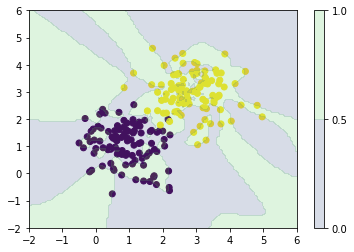

In [12]:
N1 = N2 = 100
X1 = np.random.multivariate_normal(np.array([1,1]), .5*np.eye(2), N1)
X2 = np.random.multivariate_normal(np.array([3,3]), .5*np.eye(2), N2)
X = np.r_[X1, X2]
t = np.r_[np.zeros([N1, 1]), np.ones([N2, 1])]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = t.flatten())

def gaussian_kernel(X, Y, sigma):
    K = np.exp(-cdist(X, Y)**2/(2*sigma))
    return K
def sigmoid(a):
    return 1/(1+np.exp(-a))

x = np.linspace(-2, 6, 100)
y = np.linspace(-2,6,100)
Z1, Z2 = np.meshgrid(x, y)

test_X = np.c_[Z1.reshape(-1,1), Z2.reshape(-1,1)]
sigma = .5
k = gaussian_kernel(X, test_X, sigma)
K = gaussian_kernel(X, X, sigma)

pred_y = k.T@np.linalg.inv(K)@t
plt.contourf(Z1, Z2, sigmoid(pred_y).reshape(100,100), 1, alpha = .2)
plt.colorbar()